In [1]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


### 1 Generate synthetic dataset

- synthetic dataset help to understand model process / performance under controlled conditions

y = cos(2 _ x1) + cos(3 _ x2)


In [4]:
N = 1000 # no. samples
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, 3)
Y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

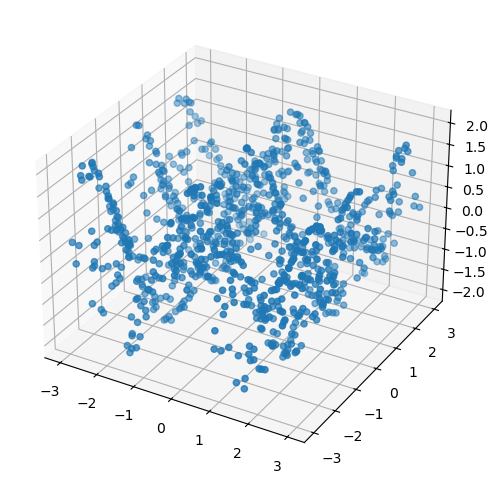

In [5]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)



### 2 Build, Compile, Train model


In [8]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(128, input_shape=(2, ), activation='relu'), # 128 nodes in first hidden layer
        tf.keras.layers.Dense(1) # 1 node at output, signifying regression, thus no activation needed (aka identity activation)
    ]
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
    loss='mse'
)

result = model.fit(
    X, Y,
    epochs=200
)

Epoch 1/200
32/32 [==============================] - 0s 340us/step - loss: 0.9731
Epoch 2/200
32/32 [==============================] - 0s 309us/step - loss: 0.9257
Epoch 3/200
32/32 [==============================] - 0s 290us/step - loss: 0.9210
Epoch 4/200
32/32 [==============================] - 0s 261us/step - loss: 0.9056
Epoch 5/200
32/32 [==============================] - 0s 254us/step - loss: 0.8784
Epoch 6/200
32/32 [==============================] - 0s 256us/step - loss: 0.8365
Epoch 7/200
32/32 [==============================] - 0s 250us/step - loss: 0.7924
Epoch 8/200
32/32 [==============================] - 0s 246us/step - loss: 0.7448
Epoch 9/200
32/32 [==============================] - 0s 244us/step - loss: 0.7214
Epoch 10/200
32/32 [==============================] - 0s 252us/step - loss: 0.6483
Epoch 11/200
32/32 [==============================] - 0s 247us/step - loss: 0.5974
Epoch 12/200
32/32 [==============================] - 0s 243us/step - loss: 0.5641
Epoch 13/200


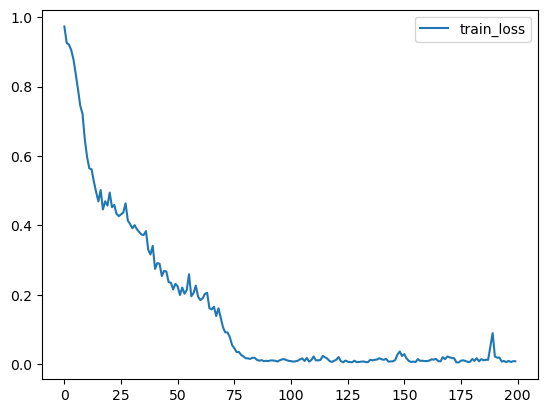

In [10]:
plt.plot(result.history['loss'], label='train_loss')
plt.legend()
plt.show()


### 3 Evaluate prediction & plot prediction surface


In [31]:
xx[0]

array([-3.        , -2.87755102, -2.75510204, -2.63265306, -2.51020408,
       -2.3877551 , -2.26530612, -2.14285714, -2.02040816, -1.89795918,
       -1.7755102 , -1.65306122, -1.53061224, -1.40816327, -1.28571429,
       -1.16326531, -1.04081633, -0.91836735, -0.79591837, -0.67346939,
       -0.55102041, -0.42857143, -0.30612245, -0.18367347, -0.06122449,
        0.06122449,  0.18367347,  0.30612245,  0.42857143,  0.55102041,
        0.67346939,  0.79591837,  0.91836735,  1.04081633,  1.16326531,
        1.28571429,  1.40816327,  1.53061224,  1.65306122,  1.7755102 ,
        1.89795918,  2.02040816,  2.14285714,  2.26530612,  2.3877551 ,
        2.51020408,  2.63265306,  2.75510204,  2.87755102,  3.        ])

In [36]:
np.vstack((xx.flatten(), yy.flatten())).T.shape

(2500, 2)

79/79 [==============================] - 0s 260us/step


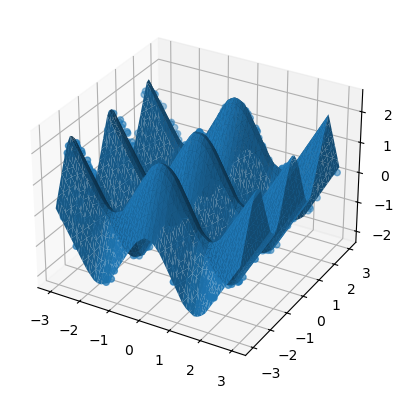

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# surface plot
line = np.linspace(-3, 3, 50) # 50 evenly space points between -3 and 3
xx, yy = np.meshgrid(line, line) # cross product between these 2 points
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T # vstack = stack 2 arrays vertically
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

### Test if neural network can extrapolate for longer range

- now is between -3 and 3
- test for -10 and 10, see if it can predict the periodicity of the cosine function used in this example


79/79 [==============================] - 0s 206us/step


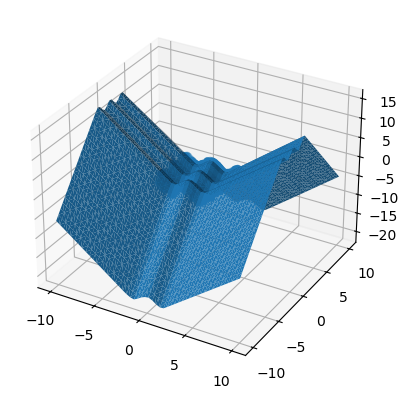

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

line = np.linspace(-10, 10, 50) # 50 evenly space points between -3 and 3
xx, yy = np.meshgrid(line, line) # cross product between these 2 points
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T # vstack = stack 2 arrays vertically
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

#### Model cannot really extrapolate and predict the periodicity of the function

- the model doesn't use a periodic activation fn
- cannot be periodic
